https://en.wikipedia.org/wiki/Elo_rating_system 

Important: __Practical Issues__ Section

Activity points? K_factor Deflation as you play?

In [ ]:
pip install numpy && pip install matplotlib

In [10]:
from math import ceil
from random import random, choices
import numpy as np
global_kFactor = 40
# Expected 1 = WIN. 0.5 = DRAW. 0 = LOSS
def expVal(ratingMe, ratingOpp):
    return 1 / (1 + 10 ** ((ratingOpp - ratingMe) / 400))

def ratingChange(ratingA, ratingB, winner, kFactor=global_kFactor):
    winA = 1 if winner == "A" else 0
    winB = 1 if winner == "B" else 0
    expA = expVal(ratingA, ratingB)
    expB = expVal(ratingB, ratingA)
    changeA = round(kFactor * (winA - expA)) # NOTE: using ceil causes more points to exist
    changeB = round(kFactor * (winB - expB))
    return changeA , changeB 

def updateRating(ratingA, ratingB, winner, kFactor=global_kFactor):
    changeA, changeB = ratingChange(ratingA, ratingB, winner, kFactor)
    return ratingA + changeA, ratingB + changeB


In [4]:
def teamRatingChange(teamA, teamB, winner, kFactor=global_kFactor):
    winA = 1 if winner == "A" else 0
    winB = 1 if winner == "B" else 0
    avgA = np.mean(teamA)
    avgB = np.mean(teamB)
    expA = [expVal(playerA, avgB) for playerA in teamA]
    expB = [expVal(playerB, avgA) for playerB in teamB]
    changeA = [round(kFactor * (winA - np.mean(expa))) for expa in expA]
    changeB = [round(kFactor * (winB - np.mean(expb))) for expb in expB]
    return np.array(changeA) , np.array(changeB)

def teamUpdateRating(ratingA, ratingB, winner, kFactor=global_kFactor):
    changeA, changeB = teamRatingChange(ratingA, ratingB, winner, kFactor)
    return ratingA + changeA, ratingB + changeB

In [29]:
winner = "B"
rA, rB = np.array([2000, 1000]), np.array([1500, 1500])
rA, rB = teamUpdateRating(rA, rB, winner)
print(rA, rB)

[1962  998] [1520 1520]


In [214]:
N = 3
players = np.array([i for i in range(N)])
ratings = [800] * N
winChance = [[None, 0.6, 0.6], [0.4, None, 0.5], [0.4, 0.5, None]]
freqs = np.array([1, 3, 3]) # Player 0 plays less often
freqs = freqs / freqs.sum() # Normalize

In [219]:
for i in range(1000): # Num games
    pair = np.random.choice(a=players, size=2, replace=False, p=freqs)
    pidx0, pidx1 = pair
    winner = "A" if random() < winChance[pidx0][pidx1] else "B"
    r0, r1 = updateRating(ratings[pidx0], ratings[pidx1], winner)
    ratings[pidx0] = r0
    ratings[pidx1] = r1


print("Ratings: ", ratings)

Ratings:  [780, 842, 778]


In [111]:
""" 
Performance Score: ('score' in elo_info)
Performance score is the final score of a player after playing a bunch of games and should be
accurate to how much effort they put in (games played & games won)
IDEA A:
    for each match :
        score += avg_opp_team_elo + (400 if did_win else -400)
    score = score / num_matches
IDEA B:
    for each match :
        score += avg_opp_team_elo * (1.2 if did_win else 0.8) + (num_wins*50)
    score = score / num_matches
IDEA C:
    score = (0.5 + win_rate) * 500 * log2(num_matches)
"""

" \nPerformance Score: ('score' in elo_info)\nPerformance score is the final score of a player after playing a bunch of games and should be\naccurate to how much effort they put in (games played & games won)\nIDEA A:\n    for each match :\n        score += avg_opp_team_elo + (400 if did_win else -400)\n    score = score / num_matches\nIDEA B:\n    for each match :\n        score += avg_opp_team_elo * (1.2 if did_win else 0.8) + (num_wins*50)\n    score = score / num_matches\nIDEA C:\n    score = (0.5 + win_rate) * 500 * log2(num_matches)\n"

# IDEA A

In [113]:
OPP_ELO = 800
play0Score, play0MatchCount, play0WinRate = 0, 20, 0.7
play1Score, play1MatchCount, play1WinRate = 0, 5, 0.9
play2Score, play2MatchCount, play2WinRate = 0, 40, 0.4
play0data, play1data, play2data = [], [], []

for i in range(1, play0MatchCount + 1):
    play0Score += OPP_ELO + (400 if random() < play0WinRate else -400) 
    play0data.append(play0Score / i)

for i in range(1, play1MatchCount + 1):
    play1Score += OPP_ELO + (400 if random() < play1WinRate else -400) 
    play1data.append(play1Score / i)

for i in range(1, play2MatchCount + 1):
    play2Score += OPP_ELO + (400 if random() < play2WinRate else -400) 
    play2data.append(play2Score / i)

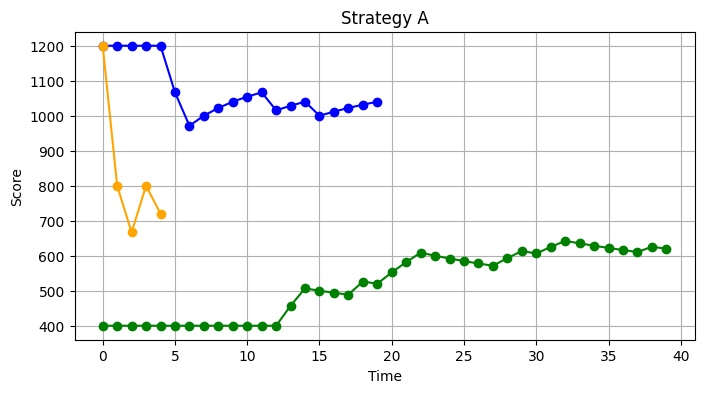

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(play0data, marker='o', color='blue')
plt.plot(play1data, marker='o', color='orange')  
plt.plot(play2data, marker='o', color='green')  
plt.title("Strategy A")
plt.xlabel("Time")
plt.ylabel("Score")
plt.grid(True)
plt.show()


# IDEA B

In [109]:
OPP_ELO = 800
play0Score, play0MatchCount, play0WinRate, winct0 = 0, 20, 0.7, 0
play1Score, play1MatchCount, play1WinRate, winct1 = 0, 5, 0.9, 0
play2Score, play2MatchCount, play2WinRate, winct2 = 0, 40, 0.4, 0
play0data, play1data, play2data = [], [], []

for i in range(1, play0MatchCount + 1):
    win = random() < play0WinRate
    winct0 += 1 if win else 0
    play0Score += OPP_ELO * (1.2 if win else 0.8) + 50*winct0
    play0data.append(play0Score / i)

for i in range(1, play1MatchCount + 1):
    win = random() < play1WinRate
    winct1 += 1 if win else 0
    play1Score += OPP_ELO * (1.2 if win else 0.8) + 50*winct1
    play1data.append(play1Score / i)

for i in range(1, play2MatchCount + 1):
    win = random() < play2WinRate
    winct2 += 1 if win else 0
    play2Score += OPP_ELO * (1.2 if win else 0.8) + 50*winct2
    play2data.append(play2Score / i)

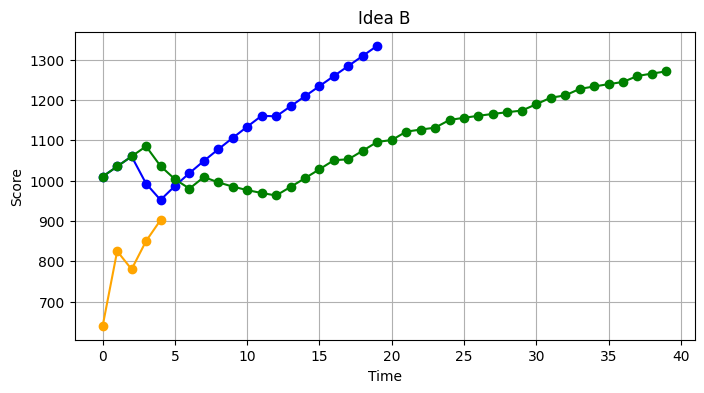

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(play0data, marker='o', color='blue')
plt.plot(play1data, marker='o', color='orange')  
plt.plot(play2data, marker='o', color='green')  
plt.title("Idea B")
plt.xlabel("Time")
plt.ylabel("Score")
plt.grid(True)
plt.show()


# IDEA C

In [119]:
from math import log
OPP_ELO = 800
play0Score, play0MatchCount, play0WinRate, winct0 = 0, 20, 0.7, 0
play1Score, play1MatchCount, play1WinRate, winct1 = 0, 10, 0.9, 0
play2Score, play2MatchCount, play2WinRate, winct2 = 0, 40, 0.4, 0
play0data, play1data, play2data = [], [], []

for i in range(1, play0MatchCount + 1):
    win = random() < play0WinRate
    winct0 += 1 if win else 0
    tScore = (0.5 + (winct0/i)) * 500 * log(i, 2)
    play0data.append(tScore)

for i in range(1, play1MatchCount + 1):
    win = random() < play1WinRate
    winct1 += 1 if win else 0
    tScore = (0.5 + (winct1/i)) * 500 * log(i, 2)
    play1data.append(tScore)

for i in range(1, play2MatchCount + 1):
    win = random() < play2WinRate
    winct2 += 1 if win else 0
    tScore = (0.5 + (winct2/i)) * 500 * log(i, 2)
    play2data.append(tScore)

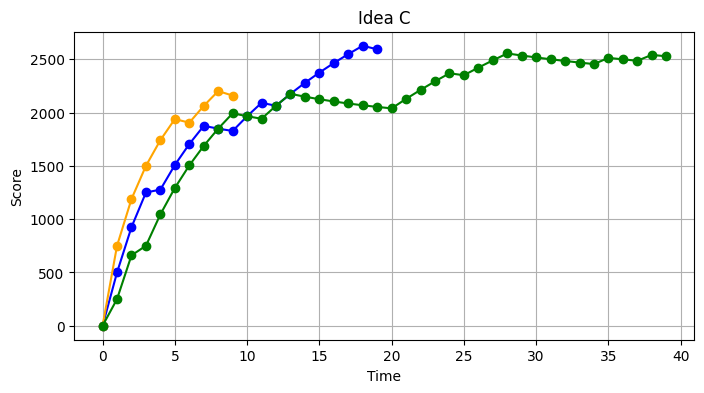

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(play0data, marker='o', color='blue')
plt.plot(play1data, marker='o', color='orange')  
plt.plot(play2data, marker='o', color='green')  
plt.title("Idea C")
plt.xlabel("Time")
plt.ylabel("Score")
plt.grid(True)
plt.show()


# IDEA D

In [ ]:
OPP_ELO = 800
play0Score, play0MatchCount, play0WinRate, winct0 = 0, 20, 0.7, 0
play1Score, play1MatchCount, play1WinRate, winct1 = 0, 5, 0.9, 0
play2Score, play2MatchCount, play2WinRate, winct2 = 0, 40, 0.4, 0
play0data, play1data, play2data = [], [], []

for i in range(1, play0MatchCount + 1):
    win = random() < play0WinRate
    winct0 += 1 if win else 0
    play0Score += OPP_ELO * (1.2 if win else 0.8) 
    play0data.append((play2Score / i) * log(i, 2))

for i in range(1, play1MatchCount + 1):
    win = random() < play1WinRate
    winct1 += 1 if win else 0
    play1Score += OPP_ELO * (1.2 if win else 0.8) 
    play1data.append((play2Score / i) * log(i, 2))

for i in range(1, play2MatchCount + 1):
    win = random() < play2WinRate
    winct2 += 1 if win else 0
    play2Score += OPP_ELO * (1.2 if win else 0.8) 
    play2data.append((play2Score / i) * log(i, 2))

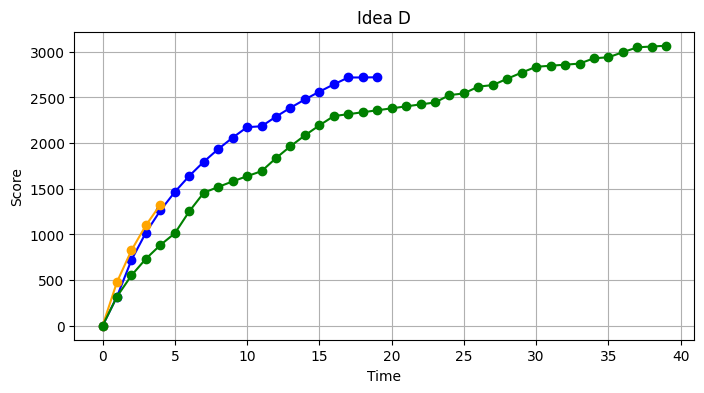

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(play0data, marker='o', color='blue')
plt.plot(play1data, marker='o', color='orange')  
plt.plot(play2data, marker='o', color='green')  
plt.title("Idea D")
plt.xlabel("Time")
plt.ylabel("Score")
plt.grid(True)
plt.show()


# IDEA C

In [ ]:
from math import log
OPP_ELO = 800
play0Score, play0MatchCount, play0WinRate, winct0 = 0, 20, 0.7, 0
play1Score, play1MatchCount, play1WinRate, winct1 = 0, 10, 0.9, 0
play2Score, play2MatchCount, play2WinRate, winct2 = 0, 40, 0.4, 0
play0data, play1data, play2data = [], [], []

for i in range(1, play0MatchCount + 1):
    win = random() < play0WinRate
    winct0 += 1 if win else 0
    tScore = (0.5 + (winct0/i)) * 500 * log(i, 2)
    play0data.append(tScore)

for i in range(1, play1MatchCount + 1):
    win = random() < play1WinRate
    winct1 += 1 if win else 0
    tScore = (0.5 + (winct1/i)) * 500 * log(i, 2)
    play1data.append(tScore)

for i in range(1, play2MatchCount + 1):
    win = random() < play2WinRate
    winct2 += 1 if win else 0
    tScore = (0.5 + (winct2/i)) * 500 * log(i, 2)
    play2data.append(tScore)

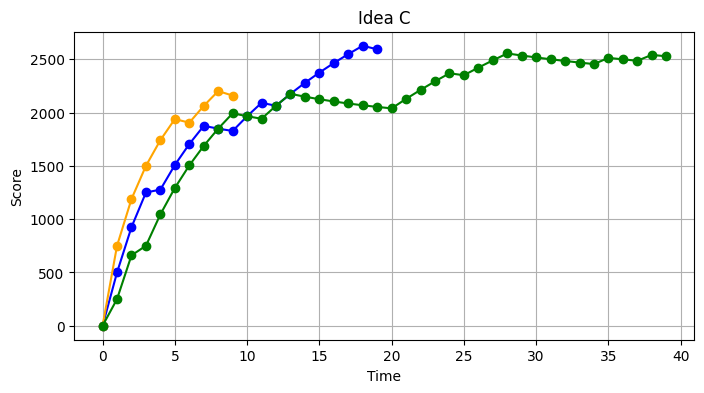

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(play0data, marker='o', color='blue')
plt.plot(play1data, marker='o', color='orange')  
plt.plot(play2data, marker='o', color='green')  
plt.title("Idea C")
plt.xlabel("Time")
plt.ylabel("Score")
plt.grid(True)
plt.show()
